In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pdb;

In [2]:
L = 8
W = 8
H = 12

In [16]:
state_space = np.zeros((L*W*H,3))

i=0
for h in range(H):
    for y in range(W):
        for x in range(L):
            state_space[i] = np.array([x,y,h])
            i=i+1
print(state_space.shape)

(768, 3)


In [4]:
rotate_actions = [-1,0,1]
linear_actions = [-1,0,1]
action_space = []
action_space.append([0,0])
for ra in rotate_actions:
    for la in linear_actions:
        if la!=0:
            action_space.append([la,ra])

action_space = np.array(action_space)          
print(action_space)

[[ 0  0]
 [-1 -1]
 [ 1 -1]
 [-1  0]
 [ 1  0]
 [-1  1]
 [ 1  1]]


In [5]:
def get_translation(h):
    h = h % H
    if h in [11,0,1]:
        t = np.array([0,1])
    elif h in [2,3,4]:
        t = np.array([1,0])
    elif h in [5,6,7]:
        t = np.array([0,-1])
    elif h in [8,9,10]:
        t = np.array([-1,0])
    else:
        1/0
    return t

def is_outside_grid(x,y):
    if x <0 or x>=L or y < 0 or y>=W:
        return True
    else:
        return False    

def calc_prob_sa_to_sd(pe,s,a,sd):
    x,y,h = s
    xd,yd,hd = sd
    la,ra = a
    
    p = 0 
    
    if la == 0:
        possible_sd = s
        if np.all(s == sd):
            p = 1.0
    elif la in [1,-1]:
        if la == -1:
            ht = (h + 6)%H
        else:
            ht = h
        dx_ideal,dy_ideal =  get_translation(ht)
        dx_plus,dy_plus =  get_translation(ht+1)
        dx_minus,dy_minus =  get_translation(ht-1)
#         import pdb; pdb.set_trace()
        if xd == x + dx_ideal and yd == y + dy_ideal:
            if hd == (h + ra) %H:
                p = 1 - 2 * pe
        elif xd == x + dx_plus and yd == y + dy_plus:
            if hd == (h + 1 + ra) %H:
                p = pe
        elif xd == x + dx_minus and yd == y + dy_minus:
            if hd == (h - 1 + ra) %H:
                p = pe
        elif xd ==x and yd==y:
            if is_outside_grid(x + dx_ideal,y + dy_ideal):
                if hd == (h + ra) %H:
                    p = p + 1 - 2 * pe
            if is_outside_grid(x + dx_plus,y + dy_plus):
                if hd == (h + 1 + ra) %H:
                    p = p +  pe
            if is_outside_grid(x + dx_minus,y + dy_minus):
                if hd == (h - 1 + ra) %H:
                    p = p +  pe
                
            
    return p
    

tpe = 0.1

ts = [5,5,1];ta = [-1,0];tsd = [4,5,2]
print(calc_prob_sa_to_sd(tpe,ts,ta,tsd)==tpe)

ts = [5,5,1];ta = [1,0];tsd = [6,5,2]
print(calc_prob_sa_to_sd(tpe,ts,ta,tsd)==tpe)

ts = [5,5,1];ta = [1,0];tsd = [5,6,1]
print(calc_prob_sa_to_sd(tpe,ts,ta,tsd)==1-2*tpe)


ts = [5,7,0];ta = [1,0];tsd = [5,7,0]
print(calc_prob_sa_to_sd(tpe,ts,ta,tsd) == 1-2*tpe)

ts = [5,7,0];ta = [1,0];tsd = [5,7,1]
print(calc_prob_sa_to_sd(tpe,ts,ta,tsd) == tpe)

ts = [5,0,0];ta = [-1,0];tsd = [5,0,0]
print(calc_prob_sa_to_sd(tpe,ts,ta,tsd) == 1-2*tpe)


ts = [5,7,0];ta = [1,1];tsd = [5,7,0]
print(calc_prob_sa_to_sd(tpe,ts,ta,tsd) == tpe )


True
True
True
True
True
True
True


In [6]:
def move(pe,s,a):
    r = np.random.random()
    if r < 1-2*pe:
        rotation_error = 0
    elif r< 1 - pe:
        rotation_error = 1
    else:
        rotation_error = -1
    x,y,h = s
    la,ra = a
    
    if la == 0:
        sd = s 
    elif la in [1,-1]:
        if la == -1:
            ht = (h + 6)%H
        else:
            ht = h
            
        rd = (h+ra+rotation_error)%H
        dx,dy =  get_translation(ht+ra+rotation_error)
        
        xd = x + dx
        yd = y + dy
        
        if is_outside_grid(xd,yd):
            xd = x
            yd = y
        sd = np.array([xd,yd,rd])
    return sd
        
ts = [5,0,0];ta = [-1,0];
for i in range(100):
    print(move(tpe,ts,ta))

print("")
ts = [5,5,1];ta = [1,0];
for i in range(100):
    print(move(tpe,ts,ta))

[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 1]
[5 0 1]
[5 0 0]
[5 0 0]
[ 5  0 11]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 1]
[5 0 0]
[5 0 0]
[ 5  0 11]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[ 5  0 11]
[5 0 0]
[5 0 0]
[5 0 1]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[ 5  0 11]
[5 0 0]
[5 0 0]
[5 0 1]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 1]
[5 0 0]
[5 0 0]
[ 5  0 11]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[ 5  0 11]
[5 0 0]
[5 0 1]
[5 0 0]
[ 5  0 11]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[ 5  0 11]
[5 0 0]
[ 5  0 11]
[5 0 0]
[5 0 1]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 1]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[5 0 0]
[ 5  0 11]
[5 0 0]
[5 0 0]
[ 5  0 11]
[5 0 0]
[5 0 0]

[5 6 1]
[6 5 2]
[5 6 1]
[5 6 1]
[5 6 1]
[5 6 0]
[5 6 1]
[5 6 1]
[5 6 1]
[5 6 1]
[5 6 1]
[6 5 2]
[5 6 1]
[6 5 2]
[5 6 1]
[5 6 1]
[6 5 2]
[5 6 1]
[5 6 1]
[5 6 1]
[5 6 1

In [7]:
def get_reward(s):
    x,y,h = s
    r = 0
    if x ==0 or y ==0 or x == W -1 or y == L -1:
        r = -100
    elif x == 3 and y in [4,5,6]:
        r = -10
    elif x == 5 and y == 6:
        r = 1
    return r

In [8]:
def state_to_index(s):
    return s[0] + s[1]*W + s[2]*W*L

def index_to_state(si):
    r = si//(W*L)
    y = (si - r*W*L)//W
    x = si - y*W - r*W*L
    return np.array([x,y,r])

def action_to_index(a):
    return (a[0]-np.min(linear_actions[0])) + (a[1]-np.min(rotate_actions[0]))*len(linear_actions) 

def index_to_action(ai):
    ra = ai//(len(linear_actions) )
    la = ai - ra*len(linear_actions) 
    return np.array([la + np.min(linear_actions[0]),ra + np.min(rotate_actions[0])])

print(index_to_state(state_to_index([0,4,3])))
print(index_to_action(action_to_index([-1,1])))

[0 4 3]
[-1  1]


In [9]:
goal = [5,6]

def calc_action_towards_goal(s):
    x,y,h = s
    angle_to_goal = np.arctan2(goal[0]-x,goal[1]-y)
    heading_to_goal = np.round(angle_to_goal/(2*np.pi)*H)%H
    
    if x==goal[0] and y == goal[1]:
        la=0
        ra=0
    else:
        if np.abs( h - heading_to_goal ) < np.abs( (h + 6)%H - heading_to_goal ):
            la = 1
            dh = heading_to_goal -  h 
        else:
            la = -1
            dh = heading_to_goal - (h+6)%H
    #     print(h,heading_to_goal,dh)
        if dh>0:
            ra = 1

        elif dh<0:
            ra = -1
        else:
            ra = 0
    
    return np.array([la,ra])

print(calc_action_towards_goal([6,6,4]))

[-1 -1]


In [10]:
def generate_pi0():
    pi0 = np.zeros((state_space.shape[0],))
    for i in range(state_space.shape[0]):
        pi0[i] = action_to_index(calc_action_towards_goal(index_to_state(i)))
    return pi0
pi0 = generate_pi0()

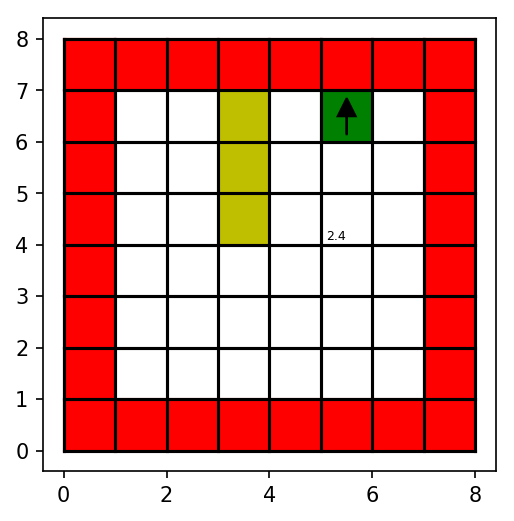

In [11]:
 def plot_grid():
    plt.rcParams['figure.dpi'] = 150
    fig = plt.figure()
    ax=fig.add_subplot(111)
    plt.axis([0,W-1,0,L-1])
    for i in range(W+1):
        plt.plot([0,L],[i,i],'k')
    for i in range(L+1):
        plt.plot([i,i],[0,W],'k')
    plt.axis('equal')
    plt.gca().set_aspect('equal', adjustable='box')
    for x in range(W):
        ax.add_patch(patches.Rectangle((x,0),1,1,color='r'))
        ax.add_patch(patches.Rectangle((x,7),1,1,color='r'))
    for y in range(L):
        ax.add_patch(patches.Rectangle((0,y),1,1,color='r'))
        ax.add_patch(patches.Rectangle((7,y),1,1,color='r'))
    ax.add_patch(patches.Rectangle((3,4),1,1,color='y'))
    ax.add_patch(patches.Rectangle((3,5),1,1,color='y'))
    ax.add_patch(patches.Rectangle((3,6),1,1,color='y'))
    ax.add_patch(patches.Rectangle((5,6),1,1,color='g'))

def plot_arrow(x,y,h):
#     x = 5
#     y = 6
#     h = 11
    l = 0.35

    ang = 2*np.pi/12*h
    yl = l*np.cos(ang)
    xl = l*np.sin(ang)
    arrow_len = 0.35
    plt.arrow(x+0.5-xl, y+0.5-yl,xl , yl, head_width=arrow_len, head_length=arrow_len, fc='k', ec='k')
def plot_text(x,y,s):
#     x = 5
#     y = 6
#     h = 11
    l = 0.35

    
    arrow_len = 0.35
    plt.text(x+0.1, y+0.1,s,fontsize=6)
    
plot_grid()
plot_arrow(5,6,0)
plot_text(5,4,2.4)
plt.show()
    

[1 6 6] [-1.  1.]
[1 7 7] [-1.  1.]
[2 7 8] [-1.  1.]
[3 7 9] [-1.  1.]
[ 4  7 10] [-1.  0.]
[ 5  7 10] [-1.  1.]


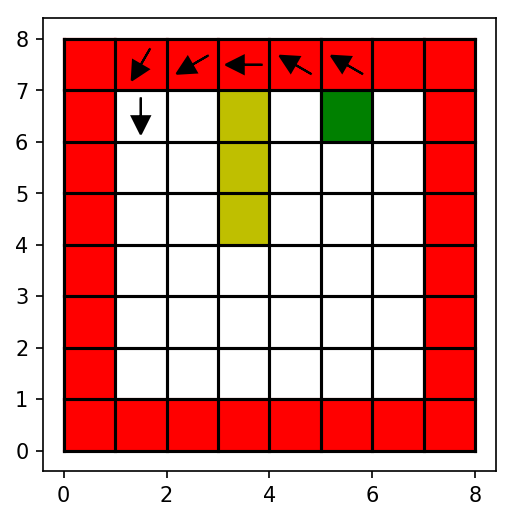

In [12]:
horizon = 10
def run_plot_policy(pi,s0,pe):
    traj = []
    plot_grid()
    si = state_to_index(s0)
    for i in range(horizon):
#         print(i,si)
        ai = pi[si]
        a = index_to_action(ai)
        s = index_to_state(si)
        traj.append(s)
        print(s,a)
        if a[0]!=0:
            plot_arrow(s[0],s[1],s[2])
        sd = move(pe,s,a)
#         print(s,sd)
        si = int(state_to_index(sd))
        
        
        if sd[0] == goal[0] and sd[1] == goal[1]:
            break
    plt.show()
    return traj
    
traj3c = run_plot_policy(pi0,[1,6,6],0)

In [13]:


def calc_V_headings(pe,s,a,sd,V_prev):
    x,y,h = sd
    sd1 =[x,y,(h-1)%H]
    sd2 =[x,y,(h)%H]
    sd3 =[x,y,(h+1)%H]
    return  (calc_prob_sa_to_sd(pe,s,a,sd1) * V_prev[state_to_index(sd1)] +
            calc_prob_sa_to_sd(pe,s,a,sd2) * V_prev[state_to_index(sd2)] +
             calc_prob_sa_to_sd(pe,s,a,sd3) * V_prev[state_to_index(sd3)])

def eval_policy(pe,lb,Pi):
    V = np.zeros((state_space.shape[0],))
    for i in range(state_space.shape[0]):
        V[i] =get_reward(index_to_state(i))
    V_prev = np.copy(V);
    for itr in range(100):
        for i in range(state_space.shape[0]):
#              pdb.set_trace()
            a = index_to_action(Pi[i])

            s = index_to_state(i)
            x,y,h = s
            xp = x+1
            xm = x-1
            yp = y+1
            ym = y-1
            
#             if x == 5 and y == 5 and h==0:
#                 pdb.set_trace()
            
            V[i] += lb * calc_V_headings(pe,s,a,s,V_prev)
            if xp>=0 and xp<W:   
                V[i] += lb * calc_V_headings(pe,s,a,[xp,y,h],V_prev)
            if xm>=0 and xm<W:   
                V[i] += lb * calc_V_headings(pe,s,a,[xm,y,h],V_prev)
            if yp>=0 and yp<L:   
                V[i] += lb * calc_V_headings(pe,s,a,[x,yp,h],V_prev)
            if ym>=0 and ym<L:   
                V[i] += lb * calc_V_headings(pe,s,a,[x,ym,h],V_prev)
        V_prev = np.copy(V)
    return V
lb = 0.9
pe = 0
V = eval_policy(pe,lb,pi0)
print(V)

[-8.77611444e+11  7.50516242e+27  7.50516242e+27 -4.70292534e+08
  7.50516242e+27  7.50516242e+27 -1.00000000e+02 -7.50516242e+29
  7.50516242e+27  7.50516242e+27  7.50516242e+27 -2.69059502e+07
  7.50516242e+27  7.50516242e+27  0.00000000e+00 -7.50516242e+29
  7.50516242e+27  7.50516242e+27  7.50516242e+27 -1.21888800e+06
  7.50516242e+27  7.50516242e+27  0.00000000e+00 -7.50516242e+29
 -4.44975327e+08 -2.57271572e+07 -1.17879300e+06 -4.09950000e+04
  7.50516242e+27  7.50516242e+27  0.00000000e+00 -3.75258121e+29
  7.50516242e+27  7.50516242e+27  7.50516242e+27  7.50516242e+27
  7.50516242e+27  7.50516242e+27 -3.75258121e+29 -3.75258121e+29
  7.50516242e+27  7.50516242e+27 -7.50516242e+29 -7.50516242e+29
 -7.50516242e+29  7.50516242e+27  0.00000000e+00 -4.10050000e+05
  7.50516242e+27  7.50516242e+27  7.50516242e+27 -4.10050000e+04
  0.00000000e+00  7.50516242e+27  0.00000000e+00 -4.10050000e+05
 -4.44975327e+08 -2.57272572e+07 -1.17889300e+06 -4.10950000e+04
 -1.00000000e+02  7.50516

0


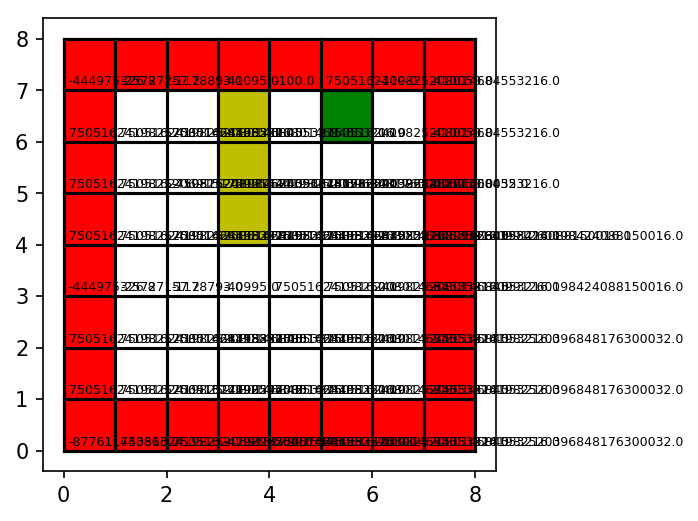

1


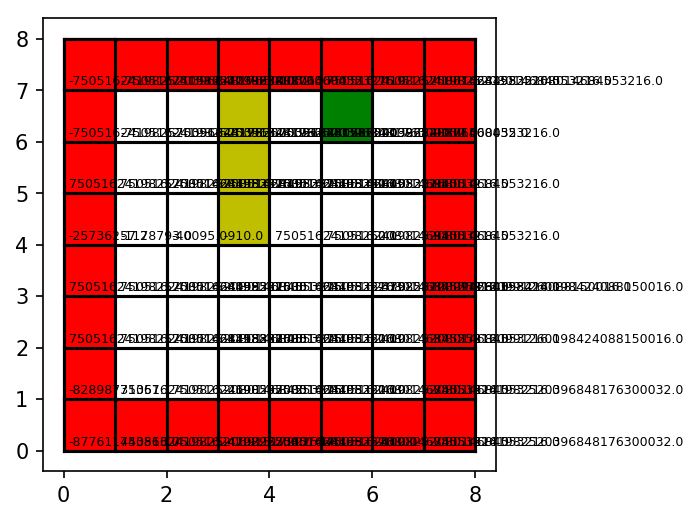

2


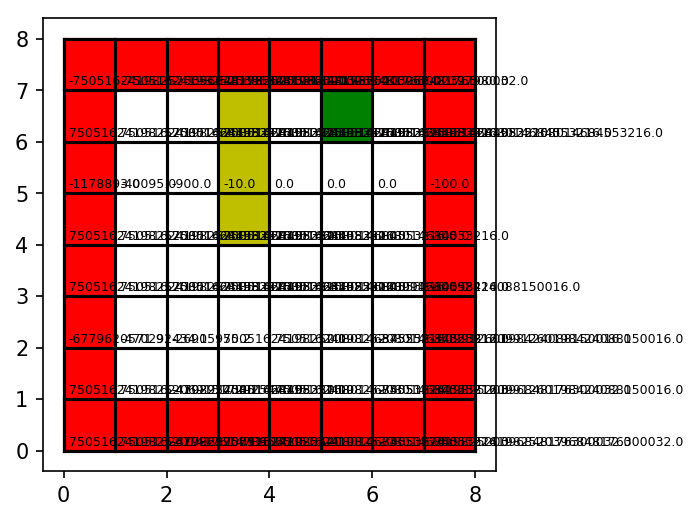

3


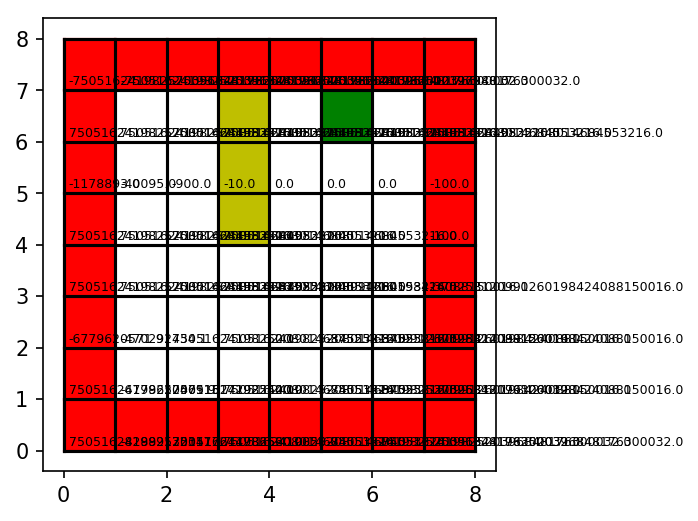

4


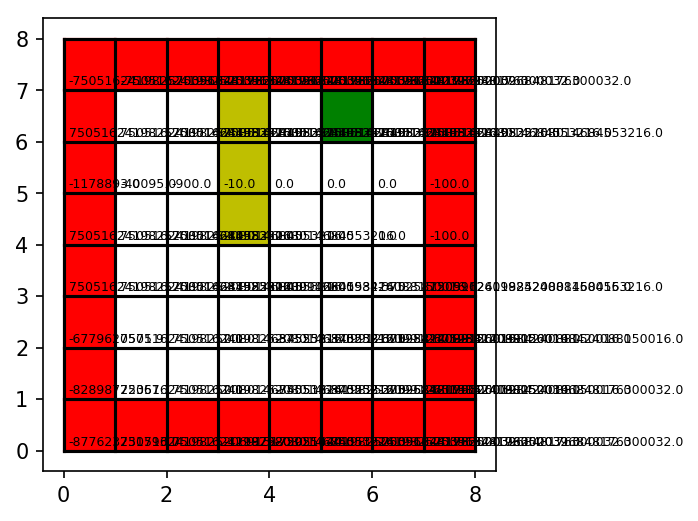

5


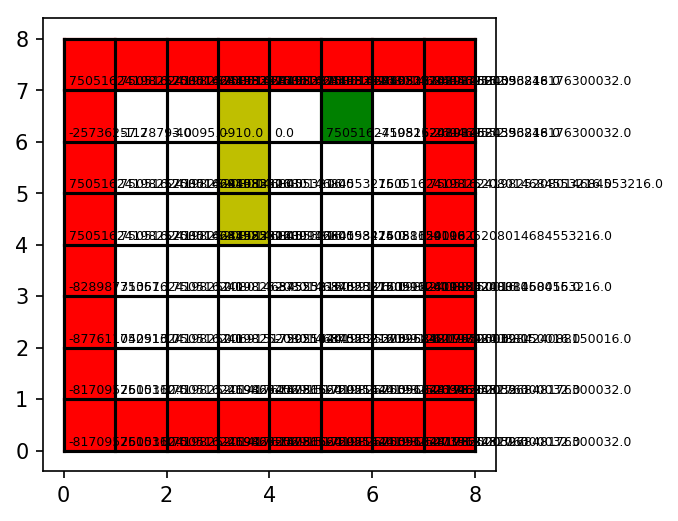

6


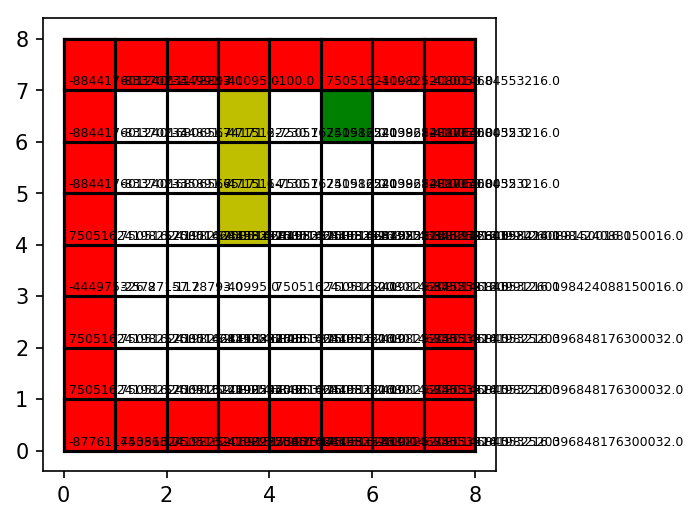

7


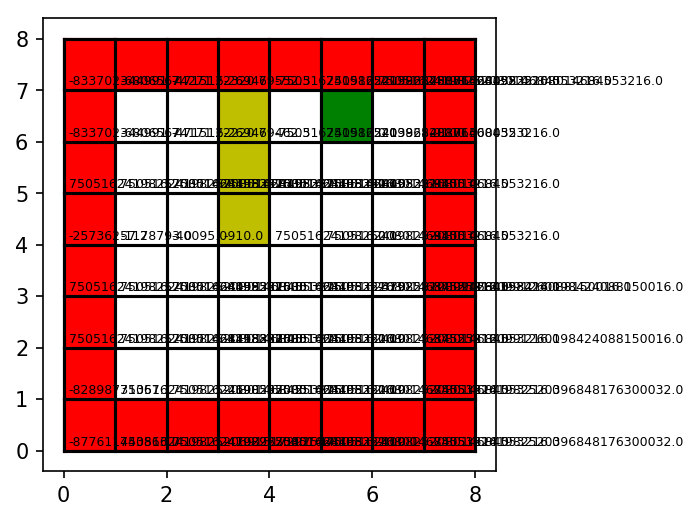

8


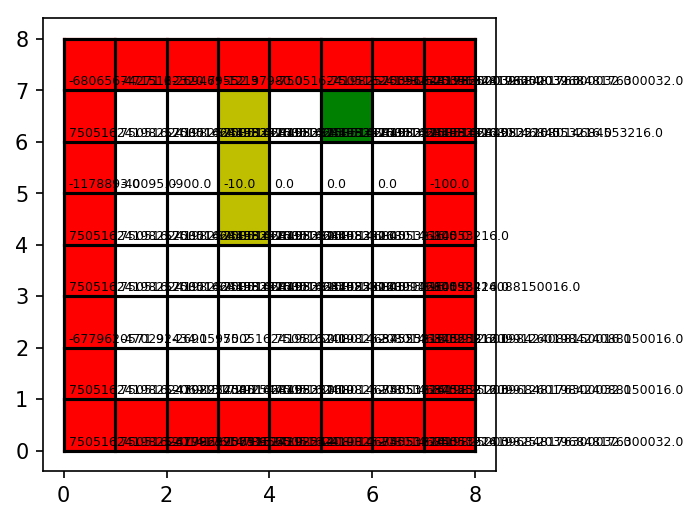

9


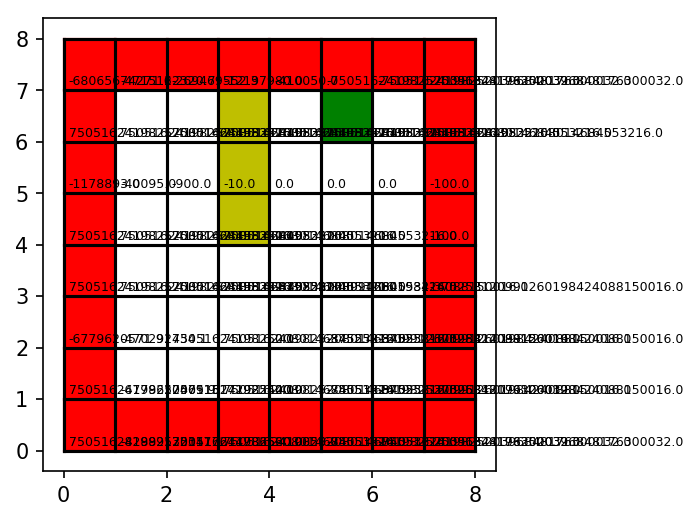

10


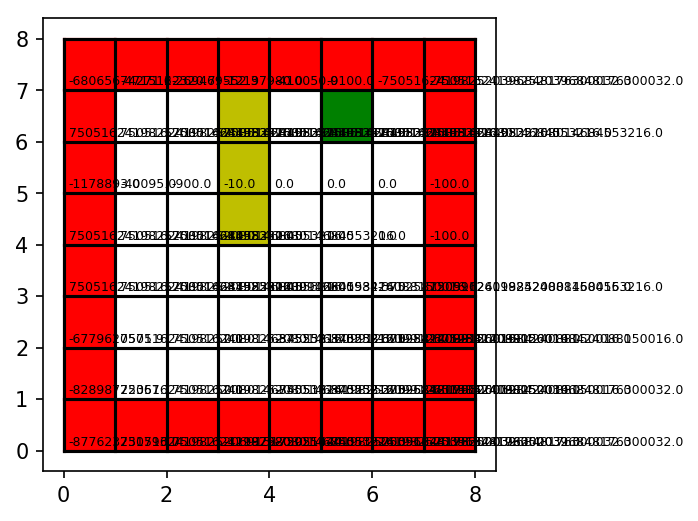

11


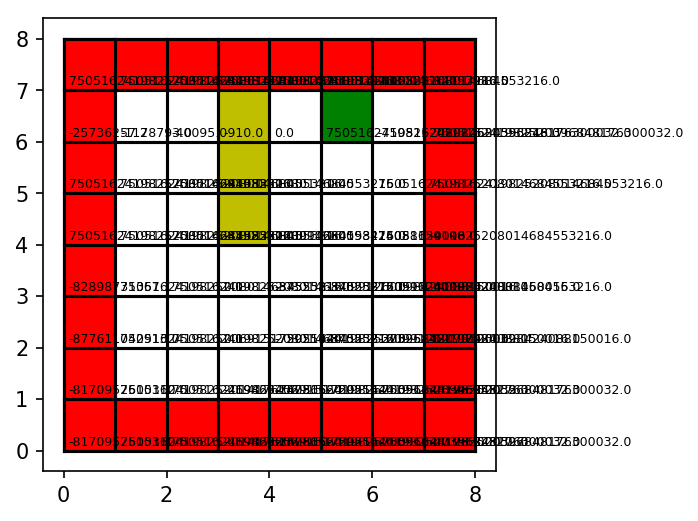

In [14]:
for hr in range(H):
    print(hr)
    plt.figure()
    plot_grid()
    for i in range(V.shape[0]):
        [x,y,h] = index_to_state(i)
        if h==hr:
            plot_text(x,y,"{:3.1f}".format(V[i]))
    plt.show()


In [15]:
# 3c?

In [ ]:
def get_Pi_from_V(V):
    for i in range(V.shape[0]):
        max_val = -np.inf
        max_ai = 0
        for j in range(action_space.shape[0]):
            xp = x+1
            xm = x-1
            yp = y+1
            ym = y-1

            V[i] += lb * calc_V_headings(pe,s,a,s,V_prev)
            if xp>=0 and xp<W:   
                V[i] += lb * calc_V_headings(pe,s,a,[xp,y,h],V_prev)
            if xm>=0 and xm<W:   
                V[i] += lb * calc_V_headings(pe,s,a,[xm,y,h],V_prev)
            if yp>=0 and yp<L:   
                V[i] += lb * calc_V_headings(pe,s,a,[x,yp,h],V_prev)
            if ym>=0 and ym<L:   
                V[i] += lb * calc_V_headings(pe,s,a,[x,ym,h],V_prev)
            